In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [49]:
df = pd.read_excel(f'./../../data/country_data/zambia/DataRequest_Vehicle Fleet_17.04.23.xlsx', sheet_name='Motor_Vehicle_Registration_Data')
df

,ID No.,Make,Model,Category,GVM,Engine Capacity,Seating Capacity,Year of Manufacture,Year of Registration,Year of Fitness,Date of Registrations,Fitness Expiry
0,1,Toyota,HARRIER,Light passenger vehicle,2000.0,2200.0,5.0,1999.0,2015,2020.0,2015-01-05,2020-06-11 00:00:00
1,2,Mazda,TITAN,Light load vehicle (GVM 3500Kg or less),2000.0,2000.0,3.0,1997.0,2015,2022.0,2015-01-05,2022-05-18 00:00:00
2,3,Toyota,Corolla,Light passenger vehicle,1375.0,1490.0,5.0,1997.0,2015,2023.0,2015-01-05,2023-05-18 00:00:00
3,4,BMW,3 Series,Light passenger vehicle,1740.0,1890.0,5.0,2000.0,2015,2021.0,2015-01-05,2021-03-03 00:00:00
4,5,Scania,RIGID TRUCK,Heavy load veh(GVM > 3500Kg),18000.0,9500.0,2.0,1998.0,2015,2024.0,2015-01-05,2024-03-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
374374,374375,Mitsubishi,Canter,Light passenger vehicle,2450.0,4210.0,3.0,2000.0,2015,2017.0,2015-08-28,2017-09-29 00:00:00
374375,374376,Ducati,Super Sport,Motorcycle (less than 3 wheels),450.0,800.0,2.0,2009.0,2016,2017.0,2016-03-22,2017-04-05 00:00:00
374376,374377,Toyota,SPRINTER,Light passenger vehicle,1375.0,1500.0,5.0,1997.0,2015,2016.0,2015-09-09,2016-09-27 00:00:00
374377,374378,Mitsubishi,Canter,Light passenger vehicle,2500.0,2700.0,3.0,1989.0,2015,2017.0,2015-05-12,2017-06-21 00:00:00


In [4]:
years = df['Year of Registration '].unique().tolist()

In [5]:
# make a dictionary to match up what we want to what's in the data
cat_dict = {'Van': ['Light load vehicle (GVM 3500Kg or less)'], 
            'Truck': ['Heavy load veh(GVM > 3500Kg)'],
            'Trailer': ['Trailer'],
            'Bus': ['Heavy passenger vehicle'],
            'Agri': ['Agricultural tractor', 'Agricultural trailer', 'Agricultural trailor'],
            'Moto': ['Motorcycle (less than 3 wheels)'],
            'Tricycle': ['Motor Tricycle']
            }

In [6]:
data = {}
for year in years:
    
    year_data = {}
#    cars = len(df[(df['Year of Registration '] == year) & (df['Seating Capacity'] <= 7)])  # cars assumed 7 or fewer seats
 #   minibuses = len(df[(df['Year of Registration '] == year) & (df['Seating Capacity'] > 7)])  # minibuses assumed greater than 7 seats

    # do it again to take account of vehs imported with fewer seats
    minibus_data = df[(df['Year of Registration '] == year) & (df['Category'] == 'Light passenger vehicle') & ((df['Seating Capacity'] > 7) | (df['Model'] == 'HIACE'))]
    
    # cars are the remainder
    cars = len(df[(df['Year of Registration '] == year) & (df['Category'] == 'Light passenger vehicle') & (~df.index.isin(minibus_data.index))])
    minibuses = len(minibus_data)
    
    year_data['Car'] = cars
    year_data['Minibus'] = minibuses
    
    # now do the rest
    for cat in cat_dict:
        year_data[cat] = len(df[(df['Year of Registration '] == year) & (df['Category'].isin(cat_dict[cat]))])
    
    data[year] = year_data

data

{2015: {'Car': 35192,
  'Minibus': 3768,
  'Van': 5697,
  'Truck': 6040,
  'Trailer': 2243,
  'Bus': 650,
  'Agri': 7,
  'Moto': 2635,
  'Tricycle': 46},
 2016: {'Car': 17852,
  'Minibus': 1935,
  'Van': 4358,
  'Truck': 3854,
  'Trailer': 1585,
  'Bus': 514,
  'Agri': 4,
  'Moto': 2524,
  'Tricycle': 73},
 2017: {'Car': 22913,
  'Minibus': 2629,
  'Van': 4695,
  'Truck': 5597,
  'Trailer': 1066,
  'Bus': 727,
  'Agri': 6,
  'Moto': 1833,
  'Tricycle': 75},
 2018: {'Car': 24044,
  'Minibus': 2783,
  'Van': 4825,
  'Truck': 8189,
  'Trailer': 2074,
  'Bus': 861,
  'Agri': 1,
  'Moto': 2156,
  'Tricycle': 89},
 2019: {'Car': 21256,
  'Minibus': 2384,
  'Van': 3422,
  'Truck': 6999,
  'Trailer': 2228,
  'Bus': 836,
  'Agri': 0,
  'Moto': 2544,
  'Tricycle': 90},
 2020: {'Car': 17203,
  'Minibus': 1690,
  'Van': 2612,
  'Truck': 5615,
  'Trailer': 1651,
  'Bus': 483,
  'Agri': 0,
  'Moto': 2193,
  'Tricycle': 97},
 2021: {'Car': 25713,
  'Minibus': 2084,
  'Van': 3503,
  'Truck': 7283,
  '

In [7]:
pd.DataFrame(data).to_csv(f'./../data/country_data/zambia/zambian-import-data-processed.csv',index=True)

OSError: Cannot save file into a non-existent directory: '..\data\country_data\zambia'

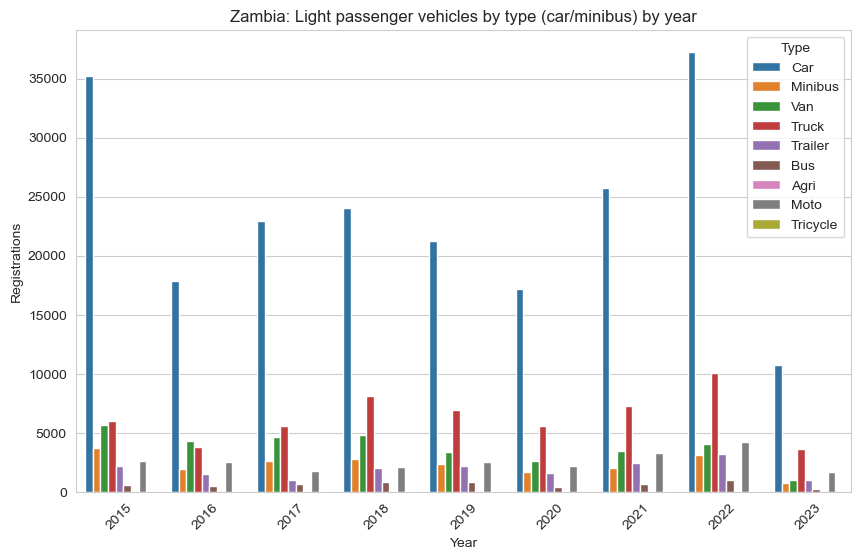

In [8]:
# plot

plot_df = pd.DataFrame(data).transpose()

# Reset the index to create a 'Year' column
plot_df_reset = plot_df.reset_index().rename(columns={'index': 'Year'})

# Reshape the DataFrame for plotting
plot_df_melted = plot_df_reset.melt(id_vars='Year', var_name='Type', value_name='Registrations')

# Ensure 'Year' is numeric
plot_df_melted['Year'] = pd.to_numeric(plot_df_melted['Year'])



# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Registrations', hue='Type', data=plot_df_melted)
plt.title('Zambia: Light passenger vehicles by type (car/minibus) by year')
plt.xlabel('Year')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.show()

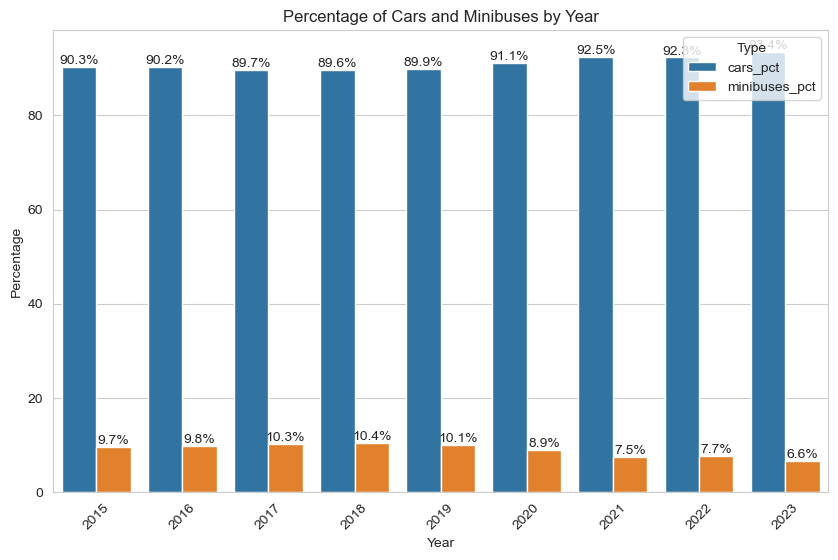

In [9]:
# Create a DataFrame
perc_df = pd.DataFrame(data).transpose()

# Reset the index to create a 'Year' column
perc_df_reset = perc_df.reset_index().rename(columns={'index': 'Year'})

# Calculate total vehicles for each year
perc_df_reset['Total'] = perc_df_reset['Car'] + perc_df_reset['Minibus']

# Calculate percentages
perc_df_reset['cars_pct'] = round((perc_df_reset['Car'] / perc_df_reset['Total']) * 100, 1)
perc_df_reset['minibuses_pct'] = round((perc_df_reset['Minibus'] / perc_df_reset['Total']) * 100, 1)

# Reshape for plotting
perc_df_melted = perc_df_reset.melt(id_vars='Year', value_vars=['cars_pct', 'minibuses_pct'], var_name='Type', value_name='Percentage')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Percentage', hue='Type', data=perc_df_melted)
plt.title('Percentage of Cars and Minibuses by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

In [10]:
perc_df_melted[(perc_df_melted['Type'] == 'minibuses_pct') & (perc_df_melted['Year'] < 2022)].Percentage.mean()

9.528571428571428

Produce an age profile for new vehicles based on this data (age = date of registration - date of manufacture)

In [54]:
vehicles=['BUS', 'CAR', 'MOTO', 'MINIBUS', 'VAN', 'TRUCK']  # vehicle types in VSM

# make a category lookup dictionary
age_cat_dict = {'BUS': ['Heavy passenger vehicle'], 
                'CAR' : ['Light passenger vehicle'], 
                'MOTO': ['Motorcycle (less than 3 wheels)', 'Motor Tricycle'], 
                'MINIBUS': ['Light passenger vehicle'], 
                'VAN': ['Light load vehicle (GVM 3500Kg or less)'], 
                'TRUCK': ['Heavy load veh(GVM > 3500Kg)']}

# TODO: make an extra check if category is CAR or minibus. if the following is true, it is minibus. Else, car.
# ((df['Seating Capacity'] > 7) | (df['Model'] == 'HIACE'))

In [55]:
years = range(2015, 2024)

# Calculate the age difference
df['age'] = df['Year of Registration '] - df['Year of Manufacture']

age_profile = {}

for year in years:
    
    age_profile[year] = {}
    # for each vehicle category
    for vehicle in age_cat_dict:
        
        if vehicle == 'CAR':
            
            age_profile[year][vehicle] = df[(df['Category'].isin(age_cat_dict[vehicle])) & ((df['Seating Capacity'] <= 7) | (df['Model'] != 'HIACE')) & (df['Year of Registration '] == year) & (df['age'] >= 0) & (df['age'] <= 32)].groupby(['age']).size().to_dict()
            
        elif vehicle == 'MINIBUS':
            
            age_profile[year][vehicle] = df[(df['Category'].isin(age_cat_dict[vehicle])) & ((df['Seating Capacity'] > 7) | (df['Model'] == 'HIACE')) & (df['Year of Registration '] == year) & (df['age'] >= 0) & (df['age'] <= 32)].groupby(['age']).size().to_dict()
            
        else:
            
            # Filter for the desired year and vehicle cat, and get rid of bogus data (age<0) and very old stuff (age>32)
            age_profile[year][vehicle] = df[(df['Category'].isin(age_cat_dict[vehicle])) & (df['Year of Registration '] == year) & (df['age'] >= 0) & (df['age'] <= 32)].groupby(['age']).size().to_dict()

age_profile


{2015: {'BUS': {0.0: 40,
   1.0: 104,
   2.0: 26,
   3.0: 10,
   4.0: 4,
   5.0: 2,
   6.0: 1,
   7.0: 2,
   8.0: 3,
   9.0: 3,
   10.0: 2,
   11.0: 12,
   12.0: 15,
   13.0: 17,
   14.0: 7,
   15.0: 31,
   16.0: 15,
   17.0: 27,
   18.0: 48,
   19.0: 38,
   20.0: 50,
   21.0: 40,
   22.0: 34,
   23.0: 24,
   24.0: 26,
   25.0: 27,
   26.0: 16,
   27.0: 11,
   28.0: 6,
   29.0: 3,
   31.0: 2,
   32.0: 1},
  'CAR': {0.0: 818,
   1.0: 723,
   2.0: 172,
   3.0: 113,
   4.0: 131,
   5.0: 147,
   6.0: 150,
   7.0: 288,
   8.0: 548,
   9.0: 1607,
   10.0: 1934,
   11.0: 3692,
   12.0: 3932,
   13.0: 6511,
   14.0: 4522,
   15.0: 3795,
   16.0: 3044,
   17.0: 2865,
   18.0: 1799,
   19.0: 1163,
   20.0: 491,
   21.0: 145,
   22.0: 100,
   23.0: 65,
   24.0: 42,
   25.0: 73,
   26.0: 24,
   27.0: 13,
   28.0: 14,
   29.0: 5,
   30.0: 7,
   31.0: 2,
   32.0: 4},
  'MOTO': {0.0: 458,
   1.0: 1466,
   2.0: 308,
   3.0: 258,
   4.0: 35,
   5.0: 50,
   6.0: 3,
   7.0: 6,
   8.0: 5,
   9.0: 4,
   10

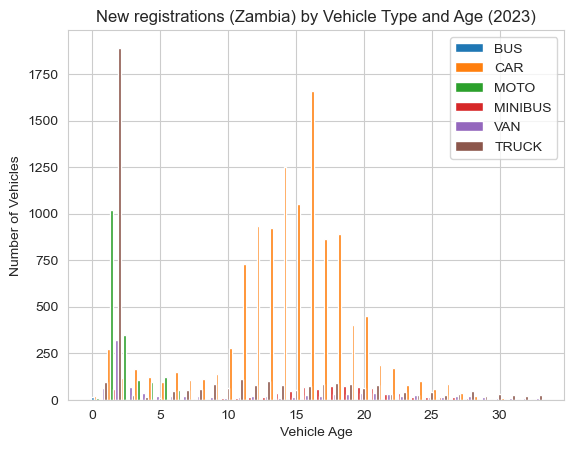

In [58]:
# plot age profiles for new vehicles
# bar width (plot)
bar_width = 0.2

year = 2023

sns.set_style('whitegrid')

fig, ax = plt.subplots()

for i, vehicle in enumerate(vehicles):
    data_for_vehicle = {year: age_profile[year][vehicle]}
    ax.bar([x + (i * bar_width) for x in range(len(data_for_vehicle[year]))], data_for_vehicle[year].values(), width=bar_width, label=vehicle)

# Plot settings
ax.set_xlabel('Vehicle Age')
ax.set_ylabel('Number of Vehicles')
plt.title(f'New registrations (Zambia) by Vehicle Type and Age ({year})')
plt.legend()

# Show the plot
plt.show()


In [64]:
# Create a list of column names
columns = [f"{vehicle_type}_{year}" for year in years for vehicle_type in vehicles]

# Create an empty DataFrame with the desired columns
df = pd.DataFrame(index=range(33), columns=columns)

# Populate the DataFrame with data from the dictionary
for year, data in age_profile.items():
    for vehicle_type, counts in data.items():
        df[f"{vehicle_type}_{year}"] = counts

# Fill missing values with 0
df.fillna(0, inplace=True)

# Replace index name with 'age'
df.index.name = 'age'

# Normalize each column such that its total is 1
df = df.div(df.sum(axis=0), axis=1)

# Print the DataFrame
df

,BUS_2015,CAR_2015,MOTO_2015,MINIBUS_2015,VAN_2015,TRUCK_2015,BUS_2016,CAR_2016,MOTO_2016,MINIBUS_2016,...,MOTO_2022,MINIBUS_2022,VAN_2022,TRUCK_2022,BUS_2023,CAR_2023,MOTO_2023,MINIBUS_2023,VAN_2023,TRUCK_2023
age,,,,,,,,,,,,,,,,,,,,,
0,0.061824,0.021007,0.170959,0.033970,0.177621,0.151732,0.107004,0.045940,0.192145,0.128815,...,0.280499,0.054949,0.254834,0.302195,0.000000,0.001656,0.006194,0.003953,0.062201,0.025790
1,0.160742,0.018568,0.547219,0.024416,0.238062,0.108927,0.093385,0.041133,0.468233,0.056906,...,0.502268,0.034704,0.113535,0.143931,0.050209,0.023619,0.574887,0.075099,0.307177,0.524404
2,0.040185,0.004417,0.114968,0.004512,0.025727,0.037475,0.149805,0.010979,0.170966,0.004656,...,0.073016,0.004499,0.033466,0.009823,0.112971,0.010284,0.197072,0.005270,0.064115,0.007488
3,0.015456,0.002902,0.096305,0.002654,0.012335,0.019654,0.013619,0.007994,0.088564,0.002587,...,0.053968,0.008033,0.028012,0.007116,0.008368,0.014467,0.058559,0.003953,0.033493,0.004160
4,0.006182,0.003364,0.013065,0.001592,0.011806,0.016822,0.007782,0.008905,0.041201,0.007243,...,0.041950,0.003856,0.023550,0.009522,0.012552,0.010458,0.053491,0.005270,0.020096,0.002496
5,0.003091,0.003775,0.018664,0.001327,0.013392,0.014490,0.007782,0.005616,0.011167,0.002587,...,0.021995,0.003213,0.019336,0.010023,0.000000,0.008454,0.069257,0.002635,0.020096,0.012479
6,0.001546,0.003852,0.001120,0.002123,0.008634,0.014324,0.007782,0.006881,0.012322,0.003621,...,0.004082,0.008676,0.017105,0.020848,0.016736,0.013160,0.028153,0.005270,0.020096,0.013866
7,0.003091,0.007396,0.002240,0.004777,0.014097,0.021985,0.000000,0.006577,0.001925,0.002069,...,0.003855,0.003856,0.017600,0.016237,0.008368,0.009151,0.002815,0.006588,0.017225,0.016362
8,0.004637,0.014073,0.001866,0.007431,0.020793,0.031312,0.005837,0.012699,0.000000,0.006725,...,0.003628,0.007069,0.013634,0.019545,0.012552,0.009587,0.001689,0.005270,0.014354,0.023849


In [65]:
df.to_excel(f'./../../data/vehicle_stock/age_distribution_new_vehicles.xlsx')